<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Mount google drive and create a variable for storing filepath My Drive/PML/Encoding/car-data-category-encoding.xlsx

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/PML/Encoding/car-data-category-encoding.xlsx'

Mounted at /content/drive


In [ ]:
# prompt: Load the data into dataframe

import pandas as pd

df = pd.read_excel(file_path)
print(df.head())


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [ ]:
# prompt: Check for missing values in each feature, print the count. Also check each row and if it has missing feature count all columns of that row and print its index

# Check for missing values in each feature
missing_values_count = df.isnull().sum()
print("Missing values per feature:\n", missing_values_count)

# Check for rows with missing values and count missing features in those rows
rows_with_missing_values = df[df.isnull().any(axis=1)]
for index, row in rows_with_missing_values.iterrows():
  missing_in_row = row.isnull().sum()
  print(f"Row index {index} has {missing_in_row} missing values.")

Missing values per feature:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
# prompt: install install category_encoders

!pip install category_encoders



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


def encode_features(df, target_column, method):
    X = df.drop(columns=[target_column],axis=1)
    y = df[target_column]

    encoder = {
        'ordinal': ce.OrdinalEncoder(),
        'onehot': ce.OneHotEncoder(use_cat_names=True),
        'binary': ce.BinaryEncoder(),
        'target': ce.TargetEncoder(),
        'frequency': ce.CountEncoder(normalize=True)
    }.get(method)

    if encoder is None:
        raise ValueError(f"Encoding method '{method}' is not supported.")

    X_encoded = encoder.fit_transform(X, y if method == 'target' else None)
    # Instead of returning a concatenated DataFrame, return X_encoded and y separately
    return X_encoded, y # Modified line to return two values


In [ ]:
# target_column  = "class"
# method="ordinal"
# X = df.drop(columns=[target_column], axis=1)
# y = df[target_column]

# encoder = {
#     'ordinal': ce.OrdinalEncoder(),
#     'onehot': ce.OneHotEncoder(use_cat_names=True),
#     'binary': ce.BinaryEncoder(),
#     'target': ce.TargetEncoder(),
#     'frequency': ce.CountEncoder(normalize=True)
# }.get(method)

# if encoder is None:
#     raise ValueError(f"Encoding method '{method}' is not supported.")

# X_encoded = encoder.fit_transform(X, y if method == 'target' else None)

In [ ]:
encoding_method = 'ordinal'  # can be 'ordinal', 'onehot', 'binary', 'target', 'frequency'

# Step 3: Encode features
X_encoded, y = encode_features(df, target_column='class', method=encoding_method)


In [ ]:
print(X_encoded.head())

   buying  maint  doors  persons  lug_boot  safety
0       1      1      1        1         1       1
1       1      1      1        1         1       2
2       1      1      1        1         1       3
3       1      1      1        1         2       1
4       1      1      1        1         2       2


You will repeat this workflow for each encoding method, and later for each classifier.

> Add blockquote



In [ ]:
#Split data in common
from sklearn.model_selection import train_test_split
X = X_encoded



Random classifier model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from typing import Tuple
import sys

def train_and_evaluate_model(X, y, model_type: str = "random_forest", encode:str ="ordinal") -> Tuple:
    """
    Trains and evaluates a classification model based on the specified model_type.

    Parameters:
        X (pd.DataFrame or np.ndarray): Feature matrix
        y (pd.Series or np.ndarray): Target vector
        model_type (str): Type of model to train. Options:
                          'random_forest', 'logistic_regression', 'svc', 'rf' (alias for random forest)
        encode (str): Encoding method. Options: 'c', 'onehot', 'binary', 'target', 'frequency'

    Returns:
        Tuple: (trained_model, y_train_pred, y_test_pred)
    """

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model selection based on switch-case
    match model_type.lower():
        case "random_forest" | "rf":
            clf = RandomForestClassifier(random_state=42)
        case "logistic_regression":
            clf = LogisticRegression(max_iter=1000, random_state=42)
        case "svc":
            clf = SVC(probability=True, random_state=42)
        case _:
            print(f"Unsupported model type: {model_type}", file=sys.stderr)
            return None

    # Train model
    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Evaluation
    print(f"\nTest Classification Report for {model_type} and encode type {encode}:\n", classification_report(y_test, y_test_pred, zero_division=0))

    return clf, y_train_pred, y_test_pred


In [ ]:
# prompt: utilize train_and_evaluate_model for random forest with ordinal for X_encoded and y

# Assuming X_encoded and y are already defined from the previous code block

trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded, y, model_type="random_forest", encode="ordinal")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded, y, model_type="logistic_regression", encode="ordinal")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded, y, model_type="svc", encode="ordinal")



Test Classification Report for random_forest and encode type ordinal:
               precision    recall  f1-score   support

         acc       0.99      0.90      0.94        83
        good       0.71      0.91      0.80        11
       unacc       0.99      1.00      0.99       235
       vgood       0.89      0.94      0.91        17

    accuracy                           0.97       346
   macro avg       0.89      0.94      0.91       346
weighted avg       0.97      0.97      0.97       346


Test Classification Report for logistic_regression and encode type ordinal:
               precision    recall  f1-score   support

         acc       0.67      0.55      0.61        83
        good       0.67      0.36      0.47        11
       unacc       0.86      0.93      0.89       235
       vgood       0.76      0.76      0.76        17

    accuracy                           0.81       346
   macro avg       0.74      0.65      0.68       346
weighted avg       0.80      0.81  

In [ ]:
# prompt: now encode with one hot and print the head and also count the features

encoding_method = 'onehot'  # Change to 'onehot'

# Step 3: Encode features
X_encoded_onehot, y = encode_features(df, target_column='class', method=encoding_method)

print(X_encoded_onehot.head())

# Count the features
num_features = X_encoded_onehot.shape[1]
print(f"\nNumber of features after one-hot encoding: {num_features}")


   buying_vhigh  buying_high  buying_med  buying_low  maint_vhigh  maint_high  \
0             1            0           0           0            1           0   
1             1            0           0           0            1           0   
2             1            0           0           0            1           0   
3             1            0           0           0            1           0   
4             1            0           0           0            1           0   

   maint_med  maint_low  doors_2  doors_3  ...  doors_5more  persons_2  \
0          0          0        1        0  ...            0          1   
1          0          0        1        0  ...            0          1   
2          0          0        1        0  ...            0          1   
3          0          0        1        0  ...            0          1   
4          0          0        1        0  ...            0          1   

   persons_4  persons_more  lug_boot_small  lug_boot_med  lug_boot_b

In [ ]:

from sklearn.decomposition import PCA

pca_onehot = PCA(n_components=0.95) # Keep components explaining 95% of the variance
X_pca_onehot = pca_onehot.fit_transform(X_encoded_onehot)




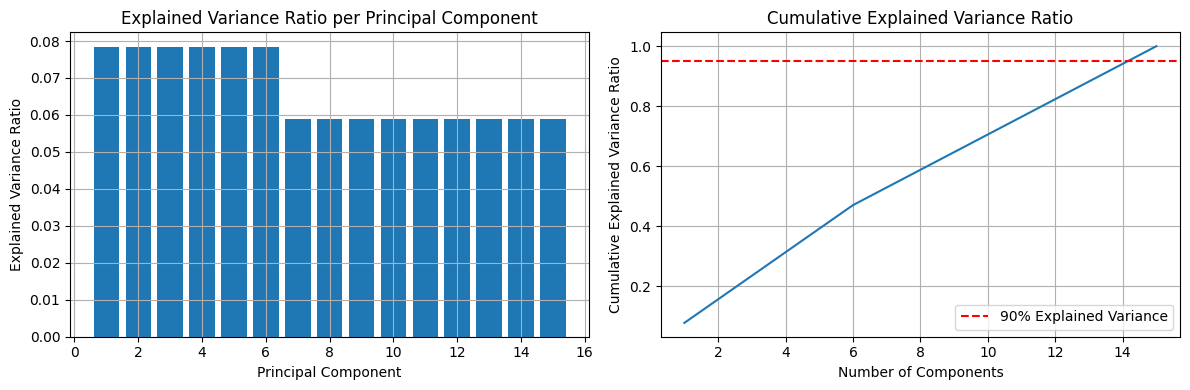

In [ ]:
# prompt: Plot bar and cumm plot for PCA X_pca_onehot side by side with cumm should have .90 line from y, chart should have grid

import matplotlib.pyplot as plt

# Assuming X_pca_onehot and pca are defined from the previous code block

explained_variance_ratio = pca_onehot.explained_variance_ratio_

# Create the bar plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(True)


# Create the cumulative explained variance plot
plt.subplot(1, 2, 2)
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--', label='90% Explained Variance')  # Add the 0.90 line

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()  # Show legend

plt.tight_layout()
plt.show()


Lets take 15 components of PCA


In [ ]:

X_pca_onehot = X_pca_onehot[:, :15] # Select the first 15 components

# Now X_pca_onehot_15 contains the first 15 principal components.  You can use this for model evaluation.
X_pca_onehot.shape



(1728, 15)

In [ ]:
# prompt: Do modal evaluation for onehot encoded

#Now do the modal evaluation for the pca components
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(pd.DataFrame(X_pca_onehot), y, model_type="random_forest", encode="onehot")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(pd.DataFrame(X_pca_onehot), y, model_type="logistic_regression", encode="onehot")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(pd.DataFrame(X_pca_onehot), y, model_type="svc", encode="onehot")



Test Classification Report for random_forest and encode type onehot:
               precision    recall  f1-score   support

         acc       0.95      0.87      0.91        83
        good       0.53      0.82      0.64        11
       unacc       0.99      1.00      0.99       235
       vgood       0.87      0.76      0.81        17

    accuracy                           0.95       346
   macro avg       0.83      0.86      0.84       346
weighted avg       0.96      0.95      0.95       346


Test Classification Report for logistic_regression and encode type onehot:
               precision    recall  f1-score   support

         acc       0.84      0.82      0.83        83
        good       0.50      0.55      0.52        11
       unacc       0.96      0.97      0.97       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.81      0.80      0.81       346
weighted avg       0.92      0.92    

In [ ]:
# prompt: now encode df with binary encoder

encoding_method = 'binary'  # Change to 'binary'

# Step 3: Encode features
X_encoded_binary, y = encode_features(df, target_column='class', method=encoding_method)

print(X_encoded_binary.head())

# Count the features
num_features = X_encoded_binary.shape[1]

print(f"\nfeature count: {num_features}")





   buying_0  buying_1  buying_2  maint_0  maint_1  maint_2  doors_0  doors_1  \
0         0         0         1        0        0        1        0        0   
1         0         0         1        0        0        1        0        0   
2         0         0         1        0        0        1        0        0   
3         0         0         1        0        0        1        0        0   
4         0         0         1        0        0        1        0        0   

   doors_2  persons_0  persons_1  lug_boot_0  lug_boot_1  safety_0  safety_1  
0        1          0          1           0           1         0         1  
1        1          0          1           0           1         1         0  
2        1          0          1           0           1         1         1  
3        1          0          1           1           0         0         1  
4        1          0          1           1           0         1         0  

feature count: 15


In [ ]:
# prompt: evaulate the model

# Assuming X_encoded_binary and y are already defined from the previous code block

trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_binary, y, model_type="random_forest", encode="binary")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_binary, y, model_type="logistic_regression", encode="binary")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_binary, y, model_type="svc", encode="binary")




Test Classification Report for random_forest and encode type binary:
               precision    recall  f1-score   support

         acc       0.82      0.76      0.79        83
        good       0.43      0.55      0.48        11
       unacc       0.95      0.99      0.97       235
       vgood       0.80      0.47      0.59        17

    accuracy                           0.90       346
   macro avg       0.75      0.69      0.71       346
weighted avg       0.90      0.90      0.89       346


Test Classification Report for logistic_regression and encode type binary:
               precision    recall  f1-score   support

         acc       0.74      0.81      0.77        83
        good       0.57      0.36      0.44        11
       unacc       0.95      0.97      0.96       235
       vgood       1.00      0.41      0.58        17

    accuracy                           0.88       346
   macro avg       0.81      0.64      0.69       346
weighted avg       0.89      0.88    

In [ ]:
# prompt: generate encoding of df with target encoding

encoding_method = 'target'  # Change to 'target'

# Step 3: Encode features
X_encoded_target, y = encode_features(df, target_column='class', method=encoding_method)

print(X_encoded_target.head())

# Count the features
num_features = X_encoded_target.shape[1]
print(f"\nNumber of features after target encoding: {num_features}")



     buying     maint     doors  persons  lug_boot    safety
0  1.666667  1.666667  1.613426      2.0  1.598958  2.000000
1  1.666667  1.666667  1.613426      2.0  1.598958  1.307292
2  1.666667  1.666667  1.613426      2.0  1.598958  1.352431
3  1.666667  1.666667  1.613426      2.0  1.532986  2.000000
4  1.666667  1.666667  1.613426      2.0  1.532986  1.307292

Number of features after target encoding: 6


In [ ]:
# prompt: standardize the x_encoded_target

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded_target_scaled = scaler.fit_transform(X_encoded_target)
X_encoded_target = pd.DataFrame(X_encoded_target_scaled, columns=X_encoded_target.columns)
print(X_encoded_target.head())


     buying     maint     doors   persons  lug_boot    safety
0  1.521255  1.612418  1.731411  1.410583  1.411164  1.411814
1  1.521255  1.612418  1.731411  1.410583  1.411164 -0.777229
2  1.521255  1.612418  1.731411  1.410583  1.411164 -0.634585
3  1.521255  1.612418  1.731411  1.410583 -0.625199  1.411814
4  1.521255  1.612418  1.731411  1.410583 -0.625199 -0.777229


In [ ]:

# Assuming X_encoded_target and y are already defined from the previous code block

trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_target_scaled, y, model_type="random_forest", encode="target")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_target_scaled, y, model_type="logistic_regression", encode="target")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_target_scaled, y, model_type="svc", encode="target")



Test Classification Report for random_forest and encode type target:
               precision    recall  f1-score   support

         acc       0.99      0.90      0.94        83
        good       0.56      0.91      0.69        11
       unacc       0.99      1.00      1.00       235
       vgood       0.93      0.82      0.88        17

    accuracy                           0.97       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346


Test Classification Report for logistic_regression and encode type target:
               precision    recall  f1-score   support

         acc       0.61      0.76      0.68        83
        good       0.00      0.00      0.00        11
       unacc       0.91      0.94      0.92       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.42      0.40       346
weighted avg       0.76      0.82    

In [ ]:
# prompt: Encode df with frequency encoding

encoding_method = 'frequency'  # Change to 'frequency'

# Step 3: Encode features
X_encoded_frequency, y = encode_features(df, target_column='class', method=encoding_method)

print(X_encoded_frequency.head())

# Count the features
num_features = X_encoded_frequency.shape[1]
print(f"\nNumber of features after frequency encoding: {num_features}")

# Assuming X_encoded_frequency and y are already defined

trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_frequency, y, model_type="random_forest", encode="frequency")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_frequency, y, model_type="logistic_regression", encode="frequency")
trained_model, y_train_pred, y_test_pred = train_and_evaluate_model(X_encoded_frequency, y, model_type="svc", encode="frequency")


   buying  maint  doors   persons  lug_boot    safety
0    0.25   0.25   0.25  0.333333  0.333333  0.333333
1    0.25   0.25   0.25  0.333333  0.333333  0.333333
2    0.25   0.25   0.25  0.333333  0.333333  0.333333
3    0.25   0.25   0.25  0.333333  0.333333  0.333333
4    0.25   0.25   0.25  0.333333  0.333333  0.333333

Number of features after frequency encoding: 6

Test Classification Report for random_forest and encode type frequency:
               precision    recall  f1-score   support

         acc       0.00      0.00      0.00        83
        good       0.00      0.00      0.00        11
       unacc       0.68      1.00      0.81       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.17      0.25      0.20       346
weighted avg       0.46      0.68      0.55       346


Test Classification Report for logistic_regression and encode type frequency:
               precision    recall  f1-s